In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import *
import seaborn as sns

In [2]:
games = pd.read_csv('input/games.csv')

In [3]:
ranking = pd.read_csv('input/ranking.csv')

In [4]:
top5players = pd.read_csv('output/top5players.csv')

TODOS LOS EQUIPOS DE LOCAL

In [5]:
todos = games[games['SEASON']>=2019]

In [6]:
df_todos = todos[['HOME_TEAM_ID','PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home','AST_home', 'REB_home']]

In [7]:
mediasLocales2019 = df_todos.groupby(['HOME_TEAM_ID']).mean()


TODOS LOS EQUIPOS DE VISITANTE

In [8]:
todosVisitantes = games[games['SEASON']>=2019]

In [9]:
df_todosVisitantes = todosVisitantes[['VISITOR_TEAM_ID','PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away','AST_away', 'REB_away']]

In [10]:
mediasVisitantes2019 = df_todosVisitantes.groupby('VISITOR_TEAM_ID').mean()

UNIMOS Y LIMPIAMOS DATAFRAMES

In [11]:
df_2019 = games[['GAME_ID','HOME_TEAM_ID', 'VISITOR_TEAM_ID','SEASON','HOME_TEAM_WINS']]

In [12]:
df_2019 = df_2019[df_2019['SEASON']>=2019]

In [13]:
df_2019 = df_2019.merge(right=mediasLocales2019, on=['HOME_TEAM_ID'])


In [14]:
df_2019 = df_2019.merge(right=mediasVisitantes2019, on=['VISITOR_TEAM_ID'])


In [15]:
df_2019['HOME_TEAM_WINS']= df_2019['HOME_TEAM_WINS'].replace({0: 'VISITANTE', 1: 'LOCAL'})

In [16]:
categoricalColumns = ['HOME_TEAM_ID', 'VISITOR_TEAM_ID']
for i in categoricalColumns:
    df_2019[i] = df_2019[i].astype('category')

In [17]:
df_2019.dtypes

GAME_ID               int64
HOME_TEAM_ID       category
VISITOR_TEAM_ID    category
SEASON                int64
HOME_TEAM_WINS       object
PTS_home            float64
FG_PCT_home         float64
FT_PCT_home         float64
FG3_PCT_home        float64
AST_home            float64
REB_home            float64
PTS_away            float64
FG_PCT_away         float64
FT_PCT_away         float64
FG3_PCT_away        float64
AST_away            float64
REB_away            float64
dtype: object

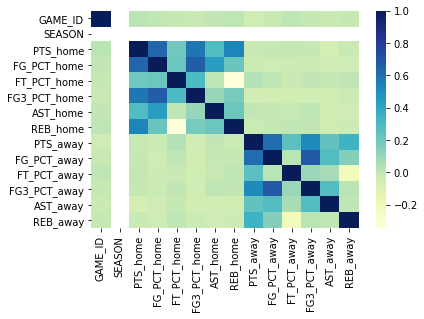

In [18]:
corr = df_2019.corr()
plt.figure()
sns.heatmap(corr, cmap='YlGnBu')

ENTRENAMOS EL MODELO

In [19]:
y = df_2019.HOME_TEAM_WINS

In [20]:
X = df_2019.drop(columns =['HOME_TEAM_WINS','SEASON','GAME_ID'])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=800, max_depth=20, 
                               min_samples_leaf=3, random_state=111, 
                               n_jobs = -1)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=-1, oob_score=False, random_state=111, verbose=0,
                       warm_start=False)

In [23]:
y_pred=model.predict(X_test)
print('Accurancy', accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred, average='weighted'))
print("Recall", recall_score(y_test, y_pred, average='weighted'))

Accurancy 0.6735751295336787
Precision 0.6726280015599755
Recall 0.6735751295336787


In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_score = model.predict_proba(X_test)


display(pd.DataFrame({
    "real":y_test,
    "predicted":y_pred,
    "probaLocal":y_score[:,0],
    "probaVisitante":y_score[:,1]
    
}).head(30))

,real,predicted,probaLocal,probaVisitante
224,VISITANTE,VISITANTE,0.075651,0.924349
824,VISITANTE,LOCAL,0.530512,0.469488
713,LOCAL,LOCAL,0.988331,0.011669
509,LOCAL,LOCAL,0.719767,0.280233
260,VISITANTE,LOCAL,0.546822,0.453178
249,LOCAL,LOCAL,0.628111,0.371889
961,VISITANTE,VISITANTE,0.263768,0.736232
146,VISITANTE,LOCAL,0.634538,0.365462
342,VISITANTE,LOCAL,0.623150,0.376850
232,VISITANTE,VISITANTE,0.138877,0.861123


In [25]:
teams = pd.read_csv('input/teams.csv')

In [26]:
teams = teams[['TEAM_ID', 'ABBREVIATION' ]]

In [27]:
teams = teams.set_index('ABBREVIATION')

In [28]:
teams

,TEAM_ID
ABBREVIATION,
ATL,1610612737
BOS,1610612738
NOP,1610612740
CHI,1610612741
DAL,1610612742
DEN,1610612743
HOU,1610612745
LAC,1610612746
LAL,1610612747


In [29]:
def homeTeam (name):
    return teams['TEAM_ID'].loc[name]

In [30]:
homeTeam('LAL')

1610612747

In [31]:
def awayTeam (name):
    return teams['TEAM_ID'].loc[name]

In [32]:
def prediceme(local, visitante):
    team1 = pd.DataFrame(mediasLocales2019.loc[homeTeam(local)])
    team1 = team1.T
    team1 = team1.reset_index()
    homesTeams = team1.rename(columns={'index':'HOME_TEAM_ID'})
    team2 = pd.DataFrame(mediasVisitantes2019.loc[awayTeam(visitante)])
    team2 = team2.T
    team2 = team2.reset_index()
    awayTeams = team2.rename(columns={'index':'VISITOR_TEAM_ID'})
    results = pd.concat([homesTeams, awayTeams], axis=1, sort=False)
    return model.predict_proba(results)

In [36]:
prediceme('MIL','GSW')

array([[0.80996639, 0.19003361]])

In [37]:
prediceme('GSW','MIL')

array([[0.48783515, 0.51216485]])